In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

In [8]:
np.random.seed(42) # Definition des variables 
n = 150
beta1 = 2
beta2_values = np.linspace(0, 0.16, 9)  # Values of beta2 to test
mse_a1 = []
mse_a2 = []

x = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1, n)

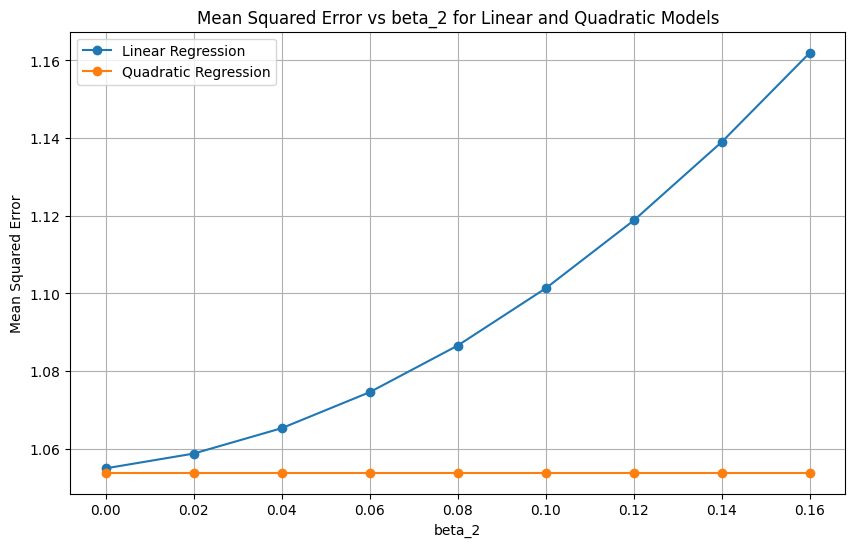

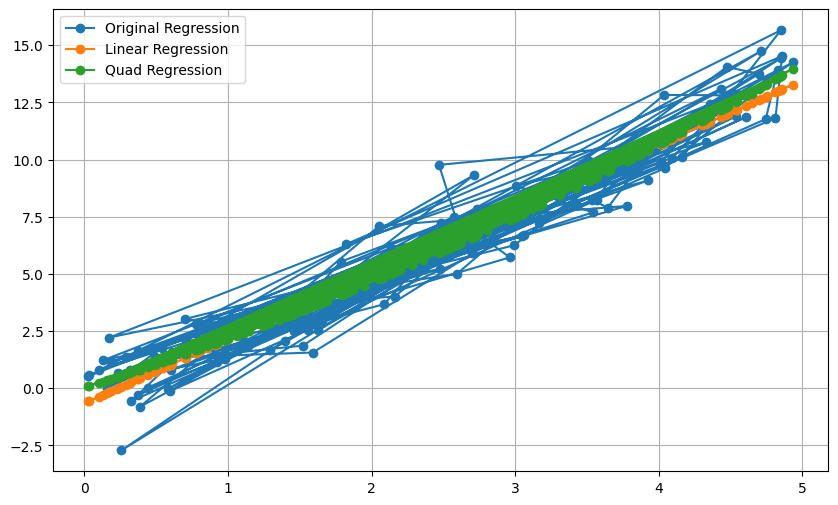

In [9]:
for beta2 in beta2_values: # Premier essai
    y = beta1 * x + beta2 * x**2 + epsilon
    
    x_reshape = x.reshape(-1, 1)
    
    # Model a1: simple linear regression (y ~ x)
    model_a1 = LinearRegression().fit(x_reshape, y)
    y_pred_a1 = model_a1.predict(x_reshape)
    mse_a1.append(mean_squared_error(y, y_pred_a1))
    
    # Model a2: quadratic regression (y ~ x + x^2)
    x_quad = np.column_stack((x, x**2))
    model_a2 = LinearRegression().fit(x_quad, y)
    y_pred_a2 = model_a2.predict(x_quad)
    mse_a2.append(mean_squared_error(y, y_pred_a2))

plt.figure(figsize=(10, 6))
plt.plot(beta2_values, mse_a1, label='Linear Regression', marker='o')
plt.plot(beta2_values, mse_a2, label='Quadratic Regression', marker='o')
plt.xlabel(r'beta_2')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs beta_2 for Linear and Quadratic Models')
plt.legend()
plt.grid(True)
plt.show()

# avec le dernier beta
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Regression', marker='o')
plt.plot(x, y_pred_a1, label='Linear Regression', marker='o')
plt.plot(x, y_pred_a2, label='Quad Regression', marker='o')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def calcul_t_stat():
        
   stat_student = stats.t.ppf(0.95, 149)
   empiriques = [] 
   variances = []
   test_statistics = []
   test_alternative = []
   delta = []

   for beta2 in beta2_values:
    
       y = beta1 * x + beta2 * x**2 + epsilon # generation de données

       x_reshape = x.reshape(-1, 1) # fit pour le modèle 

       model_a1 = LinearRegression().fit(x_reshape, y) # modélisation
       y_pred_a1 = model_a1.predict(x_reshape)
       x_quad = np.column_stack((x, x**2))
       model_a2 = LinearRegression().fit(x_quad, y)
       y_pred_a2 = model_a2.predict(x_quad)


       p1 = y - y_pred_a1 # tableau d'erreur de prédiction pour les modèles 1 et 2
       p2 = y - y_pred_a2

       delta1 = sum(p1)/150
       delta2 = sum(p2)/150
       diff = delta2 - delta1 # différence des moyennes (sous l'hypothèse alternative)

       d = p2 - p1
       d_barre = (sum(d))/150 # moyenne des différences


       var = (sum((d-d_barre)**2))/149
       test_stat = (150**0.5)*d_barre/var # Statistique pour l'hypothèse nulle

       stat_h1 = stat_student - (150**0.5)*diff/var # Statistique pour l'hypothèse altrnative


       delta.append(diff)
       empiriques.append(d_barre)
       variances.append(var)
       test_statistics.append(test_stat)
       test_alternative.append(stat_h1)

   return empiriques, variances, test_statistics, delta, test_alternative

empiriques, variances, test_statistics, delta, test_alternative = calcul_t_stat()


In [37]:
power = 1 - stats.norm.cdf(test_alternative)
power
    

array([0.04894759, 0.04894759, 0.04894759, 0.04894759, 0.04894759,
       0.04894759, 0.04894759, 0.04894759, 0.04894759])

In [ ]:
power2 = 

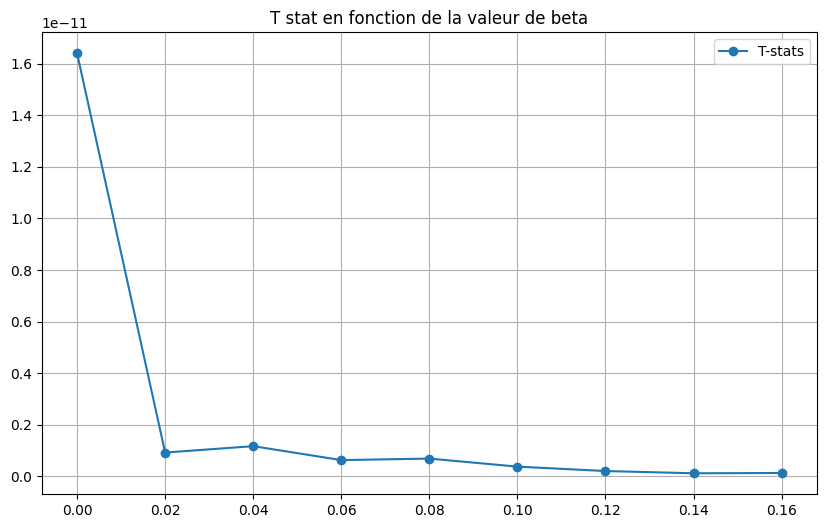

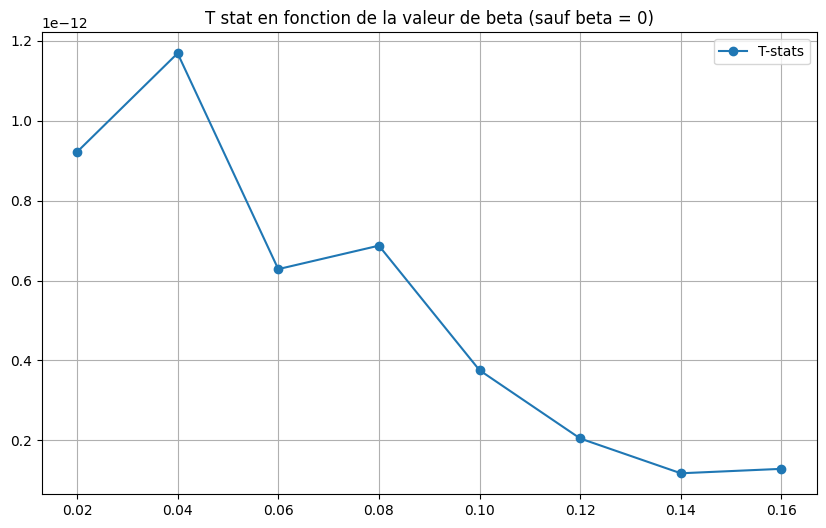

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(beta2_values, test_statistics, label='T-stats', marker='o')
plt.title('T stat en fonction de la valeur de beta')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(beta2_values[1:], test_statistics[1:], label='T-stats', marker='o')
plt.title('T stat en fonction de la valeur de beta (sauf beta = 0)')
plt.legend()
plt.grid(True)
plt.show()